In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local 
# sidm_path = str(sys.path[0]).split("/sidm")[0]
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/scampbell10@crimson.ua.edu/proxy/8787/status,
Comm: tls://192.168.202.12:8786,Workers: 0
Dashboard: /user/scampbell10@crimson.ua.edu/proxy/8787/status,Total threads: 0
Started: 48 minutes ago,Total memory: 0 B


In [2]:
## loading in the samples
samples = [
    '2Mu2E_200GeV_0p25GeV_0p01mm',
    '2Mu2E_200GeV_5p0GeV_0p2mm',
    '2Mu2E_200GeV_0p25GeV_10p0mm',
    '2Mu2E_200GeV_5p0GeV_200p0mm',
    '2Mu2E_200GeV_0p25GeV_5p0mm',
    '2Mu2E_200GeV_5p0GeV_100p0mm',
    '2Mu2E_200GeV_1p2GeV_0p048mm',
    '2Mu2E_200GeV_1p2GeV_24p0mm',
    '2Mu2E_200GeV_1p2GeV_48p0mm',
    
]

## can set max_files=-1 to run over full statistics 
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    processor.DaskExecutor(client=client),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)


#channels = ['base', 'basenoVeto', 'basenoPixel']
# channels = ['base', 'base_v2', 'base_v3', 'base_v4'] 
channels = ['base_LJPTGT30', 'base_LJPTGT40', 'base_LJPTGT50', 'base_LJPTGT60'] 
p = sidm_processor.SidmProcessor(
    channels,
    [
        "lj_base",
        'mu_lj_base',
        'egm_lj_base',
        'genA_ratio',
        'lepton_genA_base',
        'mu_lj_base',
        
    ],
)

output = runner.run(fileset, treename="Events", processor_instance=p)
out = output["out"]


def returnLxy(text):
    Lxy = {
        '0.3 cm': ['0p01', '0p2', '0p048'],
        '150 cm': ['5p0', '100p0', '24p0'],
        '300 cm': ['10p0', '200p0', '48p0'],
    }
    for key in Lxy.keys():

        if text in Lxy[key]:
            return key
        else:
            continue
            
legend_entries = [s[6:] for s in samples]

def stringReplace(string):
    if 'p' in string:
        stringNew = string.replace('p', '.')
    else:
        stringNew = string
    return stringNew

Output()

Output()

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: invalid value encountered 
in divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: invalid value encountered 
in sqrt
  result = getattr(ufunc, method)(

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

Warning: a histogram with the name photon_electron_dR_from_oneEonePLJ_highThreshold could not be filled and will be
skipped

Warning: a histogram with the name photon_electron_dR_from_oneEonePLJ_highThreshold could not be filled and will be
skipped

Warning: a histogram with the name photon_electron_dR_from_oneEonePLJ_highThreshold could not be filled and will be
skipped

Warning: a histogram with the name photon_electron_dR_from_oneEonePLJ_highThreshold could not be filled and will be
skipped

Signal not in xs cfg, assuming 1fb


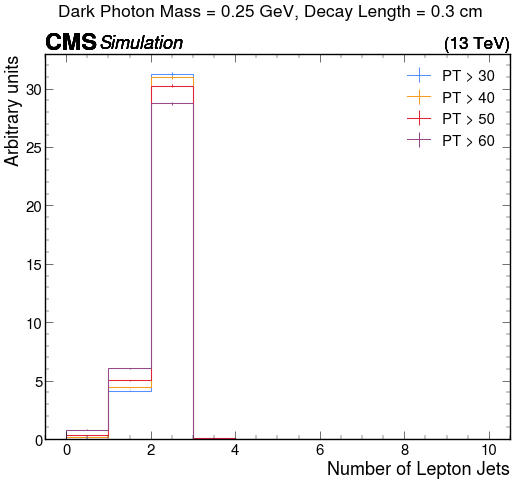

<Figure size 500x500 with 0 Axes>

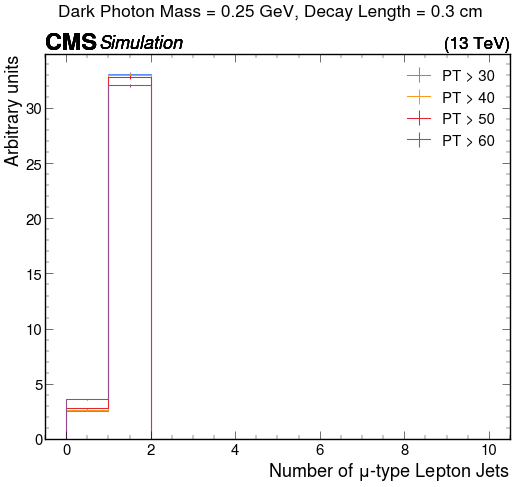

<Figure size 500x500 with 0 Axes>

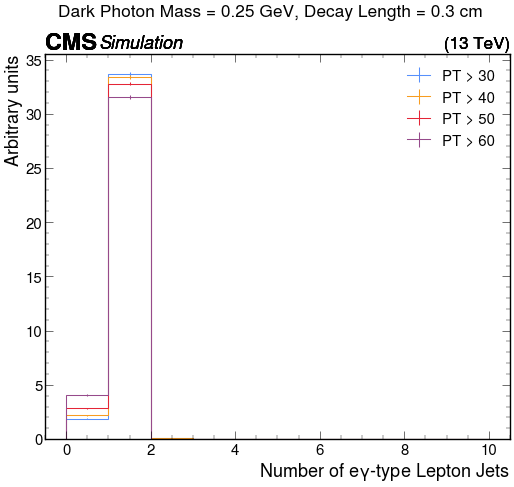

<Figure size 500x500 with 0 Axes>

In [3]:
nplots = 1
legend_entries = [s[6:] for s in samples]
path = './nLJ'

plt.subplots(1, nplots, figsize=(12, 10))
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    
    
for i, sample in enumerate(samples):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["lj_n"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["lj_n"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["lj_n"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["lj_n"][channels[3], :], density=False, label='PT > 60')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/nLJ_{legend_entries[i]}_highPT.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()
plt.subplots(1, nplots, figsize=(12, 10))   
for i, sample in enumerate(samples):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["mu_lj_n"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["mu_lj_n"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["mu_lj_n"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["mu_lj_n"][channels[3], :], density=False, label='PT > 60')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/nmuLJ_{legend_entries[i]}_highPT.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()
plt.subplots(1, nplots, figsize=(12, 10))    
for i, sample in enumerate(samples):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["egm_lj_n"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["egm_lj_n"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["egm_lj_n"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["egm_lj_n"][channels[3], :], density=False, label='PT > 60')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/negmLJ_{legend_entries[i]}_highPT.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()

In [ ]:
nplots = 1
legend_entries = [s[6:] for s in samples]
path = './LJMomentum-Ratio'

plt.subplots(1, nplots, figsize=(12, 10))
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    
    
for i, sample in enumerate(samples):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["genA_lj_ptRatio"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["genA_lj_ptRatio"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["genA_lj_ptRatio"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["genA_lj_ptRatio"][channels[3], :], density=False, label='PT > 60')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/LJMomentumRatio_{legend_entries[i]}_highPT.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()
plt.subplots(1, nplots, figsize=(12, 10))   
for i, sample in enumerate(samples):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["genA_muLj_ptRatio"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["genA_muLj_ptRatio"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["genA_muLj_ptRatio"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["genA_muLj_ptRatio"][channels[3], :], density=False, label='PT > 60')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/muLJMomentumRatio_{legend_entries[i]}_highPT.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()
plt.subplots(1, nplots, figsize=(12, 10))    
for i, sample in enumerate(samples):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[3], :], density=False, label='PT > 60')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/egmLJMomentumRatio_{legend_entries[i]}_highPT.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()

In [ ]:
nplots = 1

path = './invariantMassPlot'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
# number of electrons near dark photon


for i, sample in enumerate(samples):
    plt.subplots(1, nplots, figsize=(12, 10))
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"][channels[3], :], density=False, label='PT > 60')
    # utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[3], :], density=False, label='No PhoFull5x5SigmaIEtaIEtaCut + No PhoIsoWithEALinScalingCut + LooseID Electrons')
    # utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[4], :], density=False, label='LooseID Photons + LooseID Electrons')
    
    
    plt.legend()
    plt.ylabel("Arbitrary units")
    
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    # Apply tight layout to ensure space for the legend
    plt.tight_layout()  # Adjust the right side to make room for the legend
    plt.savefig(f'{path}/plot_LJ_invariant_mass_{legend_entries[i]}.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()